In [1]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde el archivo CSV
file_path = 'sales.csv'  # Cambia esta ruta al archivo donde guardaste el CSV
sales_data = pd.read_csv(file_path)


# Vista rápida de las primeras filas
print("Primeras filas del dataset:")
print(sales_data.head())

# Eliminar columnas innecesarias
sales_data_cleaned = sales_data.drop(columns=['Unnamed: 0'])

# Verificar valores faltantes
missing_values = sales_data_cleaned.isnull().sum()
print("\nValores faltantes por columna:")
print(missing_values)

# Vista rápida del resumen estadístico
print("\nResumen estadístico:")
print(sales_data_cleaned.describe())


Primeras filas del dataset:
   Unnamed: 0  store_ID  day_of_week        date  nb_customers_on_day  open  \
0      425390       366            4  2013-04-18                  517     1   
1      291687       394            6  2015-04-11                  694     1   
2      411278       807            4  2013-08-29                  970     1   
3      664714       802            2  2013-05-28                  473     1   
4      540835       726            4  2013-10-10                 1068     1   

   promotion state_holiday  school_holiday  sales  
0          0             0               0   4422  
1          0             0               0   8297  
2          1             0               0   9729  
3          1             0               0   6513  
4          1             0               0  10882  

Valores faltantes por columna:
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
sta

In [2]:
# Vista rápida del resumen estadístico
print("\nResumen estadístico:")
print(sales_data_cleaned.describe())



Resumen estadístico:
            store_ID    day_of_week  nb_customers_on_day           open  \
count  640840.000000  640840.000000        640840.000000  640840.000000   
mean      558.211348       4.000189           633.398577       0.830185   
std       321.878521       1.996478           464.094416       0.375470   
min         1.000000       1.000000             0.000000       0.000000   
25%       280.000000       2.000000           405.000000       1.000000   
50%       558.000000       4.000000           609.000000       1.000000   
75%       837.000000       6.000000           838.000000       1.000000   
max      1115.000000       7.000000          5458.000000       1.000000   

           promotion  school_holiday          sales  
count  640840.000000   640840.000000  640840.000000  
mean        0.381718        0.178472    5777.469011  
std         0.485808        0.382910    3851.338083  
min         0.000000        0.000000       0.000000  
25%         0.000000        0.00

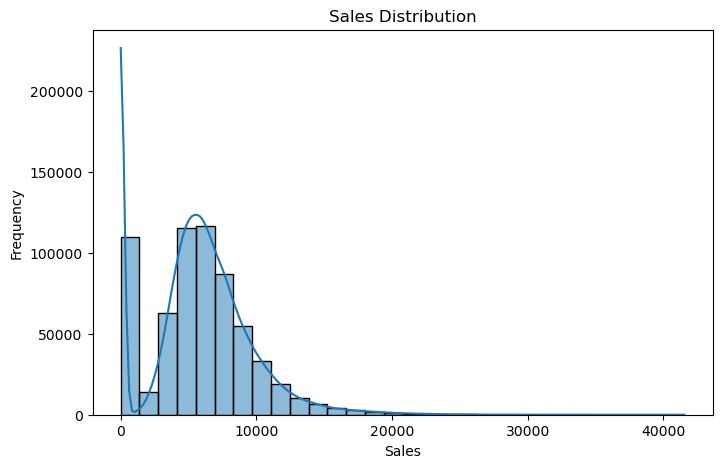

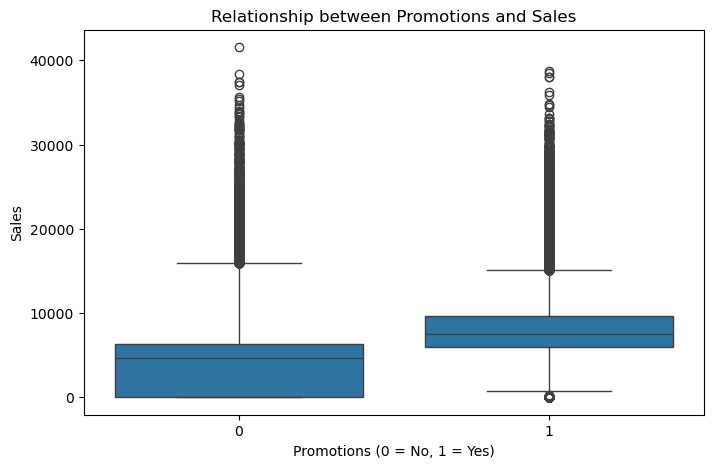

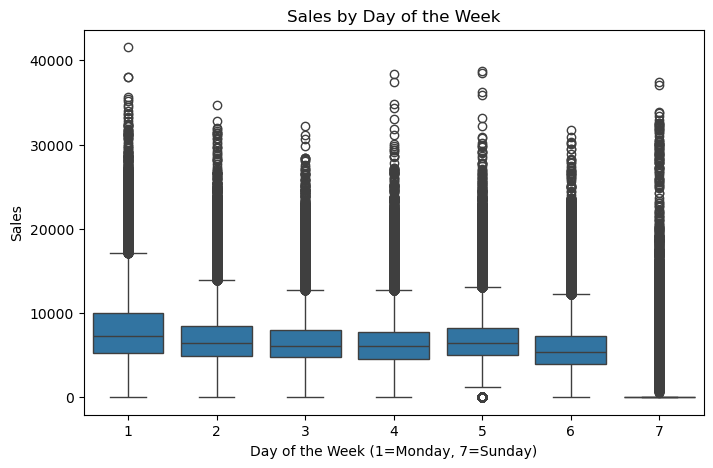

In [7]:
# Distribution of the target variable (sales)
plt.figure(figsize=(8, 5))
sns.histplot(sales_data_cleaned['sales'], kde=True, bins=30)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# Relationship between promotions and sales
plt.figure(figsize=(8, 5))
sns.boxplot(data=sales_data_cleaned, x='promotion', y='sales')
plt.title("Relationship between Promotions and Sales")
plt.xlabel("Promotions (0 = No, 1 = Yes)")
plt.ylabel("Sales")
plt.show()

# Relationship between day of the week and sales
plt.figure(figsize=(8, 5))
sns.boxplot(data=sales_data_cleaned, x='day_of_week', y='sales')
plt.title("Sales by Day of the Week")
plt.xlabel("Day of the Week (1=Monday, 7=Sunday)")
plt.ylabel("Sales")
plt.show()




In [8]:
from sklearn.model_selection import train_test_split

# Create predictor variables (X) and target variable (y)
X = sales_data_cleaned.drop(columns=['sales', 'date', 'state_holiday'])  # Exclude 'sales' and unnecessary columns
y = sales_data_cleaned['sales']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and validation data sizes:")
print(f"Training: {X_train.shape}, Validation: {X_val.shape}")



Training and validation data sizes:
Training: (512672, 6), Validation: (128168, 6)


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Calculate R² to evaluate the model
r2 = r2_score(y_val, y_pred)
print(f"\nModel R² on validation data: {r2}")





Model R² on validation data: 0.9670074877899231


In [10]:
# Create a "real-life" dataset by removing the 'sales' column
real_life_simulated = sales_data_cleaned.drop(columns=['sales'])

# Save this dataset to a CSV file
real_life_simulated.to_csv('real_life.csv', index=False)
print("Real-life dataset (without sales column) saved as 'real_life.csv'")


Real-life dataset (without sales column) saved as 'real_life.csv'


In [13]:
# Load the real-life dataset
real_life_data_path = 'data/real_life.csv'  # Update this to the path of your real-life data
real_life_data = pd.read_csv(real_life_data_path)

# Prepare the data (make sure the columns match X_train)
real_life_features = real_life_data[X.columns]

# Make predictions
real_life_data['sales'] = model.predict(real_life_features)

# Save the predictions to a CSV file
real_life_data.to_csv('G1.csv', index=False)
print("\nPredictions saved to 'G1.csv'")




Predictions saved to 'G1.csv'


In [ ]:
# Replace this with the actual sales column from Joao
real_sales_actual = real_life_data['sales_actual']  # Update with the actual sales column

# Calculate R² on real-life data
r2_real_life = r2_score(real_sales_actual, real_life_data['sales'])

# Calculate the R² difference
r2_difference = abs(r2 - r2_real_life)

print(f"\nR² on real-life data: {r2_real_life}")
print(f"R² Difference: {r2_difference}")

